<a href="https://colab.research.google.com/github/denisbrunom/data_science_estudo/blob/master/Analisando_os_Dados_do_Airbnb_Bueno_Aires.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="city" width="100%" src="https://www.brasileirosemushuaia.com.br/media/catalog/category/banner-buenosaires-min.jpg">

#### **Data Science na Prática 2.0**


---

# Análise dos Dados do Airbnb - *Buenos Aires*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

  Buenos Aires é a capital da Argentina e do tango. Nos bairros antigos, você encontra restaurantes românticos e uma vida noturna animada. A herança europeia de Buenos Aires fica evidente nas avenidas, parques e arquitetura da cidade. Buenos Aires recebe muitos turistas, principalmente do Brasil, em areas centrais da cidade onde o fluxo é maior se fala o "Portunhol" Português + Espanhol, e tambem aceita o real como moeda alem é claro do dolar.
  
  Agora algumas informações para facilitar a leitura do nosso projeto.
* A moeda da Argentina é o `Peso argentino`. É uma moeda desvalorizada em comparação com real o que faz a cidade receber muitos Brasileiros. Nossa analise vai utilizar a moeda local, então tudo em Peso Argentino, ok?
* O idioma do país é o espanhol.
* Área: 203 km²
* Área metropolitana: 4.758 km²
* População: 2,89 milhões (2010)   

**Quando Viajar para Bueno Aires**
* Primavera: temperatura agradável e cidade florida (de setembro a dezembro);
* Verão: temperatura alta e cidade vazia (dezembro a março);
* Outono: temperatura amena e temporada de vinhos (março a junho);
* Inverno: temperatura baixa, mas sem neve (junho a setembro).


## Obtenção dos Dados

**Neste *notebook*, iremos analisar os dados referentes à cidade Buenos Aires, e ver quais insights podem ser extraídos a partir de dados brutos.**


In [1]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv("http://data.insideairbnb.com/argentina/ciudad-aut%C3%B3noma-de-buenos-aires/buenos-aires/2020-04-26/visualisations/listings.csv")

## Análise dos Dados


**Dicionário das variáveis**

* `id` - número de id gerado para identificar o imóvel
* `name` - nome da propriedade anunciada
* `host_id` - número de id do proprietário (anfitrião) da propriedade
* `host_name` - Nome do anfitrião
* `neighbourhood_group` - esta coluna não contém nenhum valor válido
* `neighbourhood` - nome do bairro
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - informa o tipo de quarto que é oferecido
* `price` - preço para alugar o imóvel
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de reviews que a propriedade possui
* `last_review` - data do último review
* `reviews_per_month` - quantidade de reviews por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.




In [3]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,11508,Amazing Luxurious Apt-Palermo Soho,42762,Candela,NaN,Palermo,-34.58184,-58.42415,Entire home/apt,3983,2,26,2019-11-28,0.27,1,365
1,12463,Room in Recoleta - awesome location,48799,Matt,NaN,Recoleta,-34.59761,-58.39468,Private room,1593,1,20,2017-12-11,0.16,1,365
2,13095,Standard Room at Palermo Viejo B&B,50994,Ariel,NaN,Palermo,-34.59382,-58.42994,Private room,2987,1,1,2018-12-18,0.06,7,365
3,13096,Standard Room in Palermo Viejo B&B,50994,Ariel,NaN,Palermo,-34.59398,-58.42853,Private room,2987,1,0,NaN,NaN,7,365
4,13097,Standard Room at Palermo Viejo B&B,50994,Ariel,NaN,Palermo,-34.59348,-58.42949,Private room,2987,1,66,2019-11-27,1.89,7,365


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

In [4]:
# identificar o volume de dados do DataFrame
print("Entradas:\t {}".format(df.shape[0]))
print("Variáveis:\t {}\n".format(df.shape[1]))

# verificar as 5 primeiras entradas do dataset
display(df.dtypes)

Entradas:	 23729
Variáveis:	 16



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**
A qualidade de um *dataset* está diretamente relacionada à quantidade de valores ausentes. É importante entender logo no início se esses valores nulos são significativos comparados ao total de entradas.
* A coluna `neighbourhood_group` possui 100% dos seus valores faltantes.
* As variáveis `reviews_per_month` e `last_review` possuem valores nulos em quase metade das linhas.
* As variáveis `name` e `host_name` tem aproximadamente 0,1% dos valores nulos.

In [5]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

neighbourhood_group               1.000000
reviews_per_month                 0.274221
last_review                       0.274221
name                              0.000421
host_name                         0.000126
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_id                           0.000000
id                                0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?** 

Vamos plotar um histograma para identificar as disribuições das variáveis.

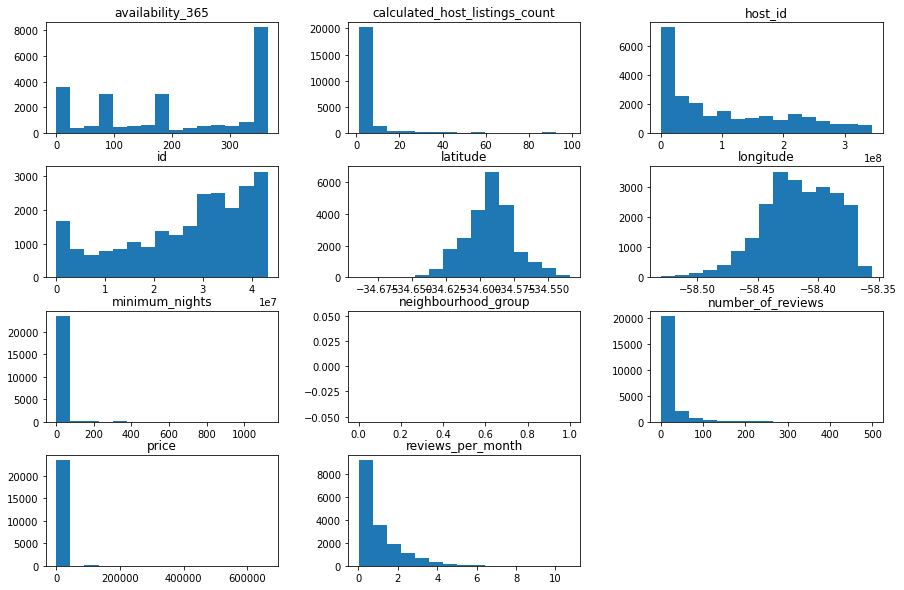

In [6]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, grid= False, figsize=(15,10));

r
A media do aluguei é `$4014,00` pesos argentinos, convertendo para o real ficamos com o valor aproximado de `R$288,00`.

In [7]:
# ver a média da coluna `price`
df.price.mean()

4014.87559526318

### **Q4.Há outliers presentes?**
Pela distribuição do histograma, é possível verificar indícios da presença de *outliers*. Olhe por exemplo as variáveis `price`, `minimum_nights`,  `calculated_host_listings_count` e `number_of_reviews`.

Os valores não seguem uma distruição, e distorcem toda a representação gráfica. Para confirmar, há duas maneiras rápidas que auxiliam a detecção de *outliers*. São elas:

* Resumo estatístico por meio do método `describe()`
* Plotar `boxplots` para a variável.

In [8]:
# ver o resumo estatístico das variáveis numéricas
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,23729.000000,23729.000000,23729.00000,17222.000000,23729.000000,23729.000000
mean,4014.875595,6.027519,16.31333,1.053696,6.272704,209.383750
std,16075.326378,25.635455,32.32226,1.158269,14.675388,137.991373
min,0.000000,1.000000,0.00000,0.010000,1.000000,0.000000
25%,1394.000000,1.000000,0.00000,0.230000,1.000000,89.000000
50%,2124.000000,3.000000,4.00000,0.640000,1.000000,180.000000
75%,3319.000000,4.000000,18.00000,1.470000,4.000000,363.000000
max,663732.000000,1125.000000,500.00000,10.730000,99.000000,365.000000


Olhando o resumo estatístico acima, podemos confirmar algumas hipóteses como:

* A variável `price` possui 75% do valor abaixo de `$3319,00`, porém seu valor máximo é `$663732,00`.
* A quantidade mínima de noites (`minimum_nights`) está acima de 365 dias no ano.
* Vaor minimo de aluguel está `$0,00` 

#### Boxplot para minimum_nights


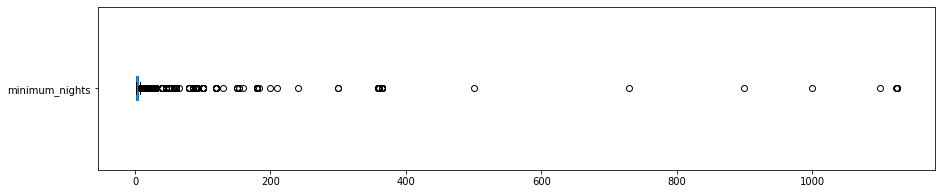

minimum_nights: valores acima de 30:
339 entradas
1.4286%


In [9]:
# minimum_nights
df.minimum_nights.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# ver quantidade de valores acima de 30 dias para minimum_nights
print("minimum_nights: valores acima de 30:")
print("{} entradas".format(len(df[df.minimum_nights > 30])))
print("{:.4f}%".format((len(df[df.minimum_nights > 30]) / df.shape[0])*100))

#### Boxplot para price


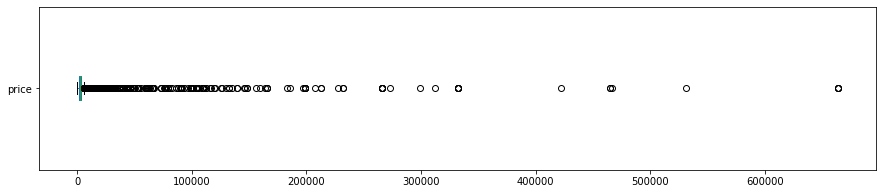


price: valores acima de 8000
1172 entradas
4.9391%


In [10]:
# price
df.price.plot(kind='box', vert=False, figsize=(15, 3),)
plt.show()

# ver quantidade de valores acima de 8000 para price
print("\nprice: valores acima de 8000")
print("{} entradas".format(len(df[df.price > 8000])))
print("{:.4f}%".format((len(df[df.price > 8000]) / df.shape[0])*100))

# df.price.plot(kind='box', vert=False, xlim=(0,1300), figsize=(15,3));

Como ja verificado que temos outliers nas variáveis prince e minimum_nights, vamos agora limpar o DataFrame elas e plotar novamente o histograma.

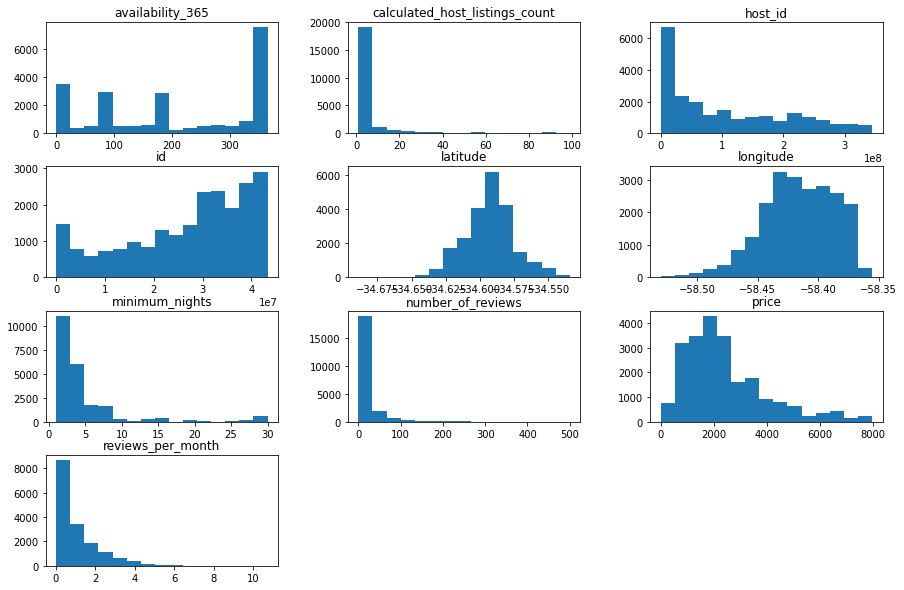

In [11]:
# remover os *outliers* em um novo DataFrame
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 8000].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis=0, inplace=True)

# remover `neighbourhood_group`, pois está vazio
df_clean.drop('neighbourhood_group', axis=1, inplace=True)

# plotar o histograma para as variáveis numéricas
df_clean.hist(bins=15, grid=False, figsize=(15,10));

Após a limpeza dos dados percebemos que temos uma melhor distribuição das variáveis.


### **Q4. Qual a correlação existente entre as variáveis**

Correlação significa que existe uma relação entre duas coisas. No nosso contexto, estamos buscando relação ou semelhança entre duas variáveis.

Essa relação pode ser medida, e é função do coeficiente de correlação estabelecer qual a intensidade dela. Para identificar as correlações existentes entre as variáveis de interesse, vou:

* Criar uma matriz de correlação
* Gerar um *heatmap* a partir dessa matriz, usando a biblioteca `seaborn`


In [12]:
# criar uma matriz de correlação
# criar uma matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()
# mostrar a matriz de correlação
display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.019734,0.031893,-0.008129,0.157426,0.136354
minimum_nights,-0.019734,1.000000,-0.098821,-0.151604,0.093172,0.027827
number_of_reviews,0.031893,-0.098821,1.000000,0.628497,-0.053856,0.079038
reviews_per_month,-0.008129,-0.151604,0.628497,1.000000,-0.083056,-0.015469
calculated_host_listings_count,0.157426,0.093172,-0.053856,-0.083056,1.000000,0.096443
availability_365,0.136354,0.027827,0.079038,-0.015469,0.096443,1.000000


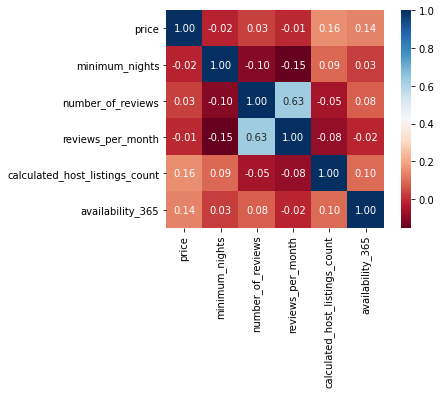

In [13]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**

In [14]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()

Entire home/apt    17084
Private room        4376
Shared room          536
Hotel room           241
Name: room_type, dtype: int64

In [15]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df_clean.room_type.value_counts() / df_clean.shape[0]

Entire home/apt    0.768269
Private room       0.196789
Shared room        0.024104
Hotel room         0.010838
Name: room_type, dtype: float64

In [16]:
df_clean.neighbourhood.value_counts()

Palermo              6621
Recoleta             3644
San Nicolas          1312
Retiro               1148
Balvanera            1120
Belgrano             1025
Monserrat             951
Almagro               936
Villa Crespo          757
San Telmo             693
Caballito             443
Nuñez                 443
Colegiales            429
Chacarita             384
Constitucion          310
Villa Urquiza         233
Puerto Madero         184
Barracas              161
San Cristobal         143
Saavedra              132
Boca                  129
Boedo                 113
Flores                110
Villa Ortuzar          91
Coghlan                86
Villa Devoto           70
Parque Patricios       69
Villa Del Parque       54
Parque Chacabuco       53
Parque Chas            49
Villa Pueyrredon       41
Floresta               38
Agronomia              31
Villa Gral. Mitre      31
Paternal               26
Villa Santa Rita       24
Velez Sarsfield        22
Villa Luro             20
Monte Castro

### **Q6. Qual a localidade mais cara do dataset?**



In [17]:
# ver preços por bairros, na média
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:5]

neighbourhood
Puerto Madero    4418.141304
Villa Soldati    3761.666667
Palermo          2882.825253
Retiro           2747.598432
Recoleta         2710.493963
Name: price, dtype: float64

In [18]:
# ver quantidade de imóveis no Puerto Madero
print(df_clean[df_clean.neighbourhood == "Villa Soldati"].shape)

# ver as 3 entradas do Puerto Madero
df_clean[df_clean.neighbourhood == "Villa Soldati"]

(3, 15)


,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
14026,32548725,Departamento amplio y cómodo,226116702,Aneth,Villa Soldati,-34.66094,-58.43645,Entire home/apt,2655,1,0,NaN,NaN,2,179
15710,34492123,Muy buen hambiente..tranquilidad y espacio,260348454,Nilsa,Villa Soldati,-34.65855,-58.44305,Private room,3983,1,0,NaN,NaN,1,364
16022,34811527,Departamento capital federal 4 ambientes grandes,262448759,Fer,Villa Soldati,-34.66639,-58.44716,Private room,4647,1,0,NaN,NaN,1,365


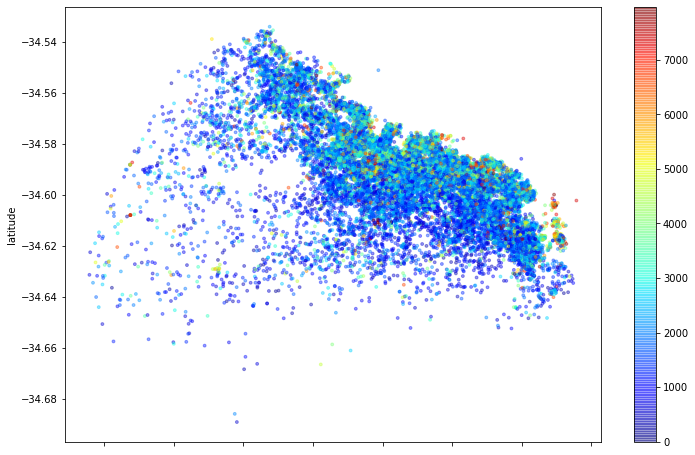

In [19]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

### **Q7. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [20]:
# ver a média da coluna `minimum_nights``
df_clean.minimum_nights.mean()

4.150919638440437

## Conclusões

Foi feita apenas uma análise superficial na base de dados do Airbnb, porém já se percebeu que existem *outliers* em algumas das variáveis. 

Também se notou que em algumas localidades há poucos imóveis disponíveis, o que pode distorcer as informações estatísticas de alguns atributos.

* Notamos que Buenos Aires tem uma media diaria de 4 noites.

Analisando os 5 primeiros bairros temos em ordem:

* Puerto Madero com *184* imoveis disponiveis e media de $4418,00 pesos argentinos. 

* Villa Soldati com *3* imoveis e $3761 é um dos outliers citados.

* Palermo com *6621* imoveis disponiveis e media de $2882,00 pesos argentinos. 

* Retiro   com *1148* imoveis disponiveis e media de $2747,00 pesos argentinos.   

* Recoleta com *3644* imoveis disponiveis e media de $2710,00 pesos argentinos. 

**Porto Madeiro** é um bairro a beira mar, com cara de primeiro mundo, é la que se encontra o `Museu no Humor` e tambem para quem procura a historia dos imigrantes o `Museu Nacional da Imigração`, Alêm que é aqui que se encontra a `Reserva Ecológica de Costanera Sur`.

**Palermo** é onde se encontra a maior quantidade de imoveis para locação em Bueno Aires, os pricipais pontos turisticos da cidade são o `Planetário Galileu Galilei` e o jardim de rosas do `Parque Tres de Febrero`, por ser o maior bairro da cidade Palermo abriga muitas botiques e bares populares e baladas.

**Retiro** faz divisa com San Nicolás e é casa do famoso terminal de ônibus e trem que recebem o mesmo nome, tambem é lar da `Torre Monumental` e `Plaza san Martín`.

**Recoleta** é considerada a região mais elegante e "europeia" da cidade. Basicamente é a area residencia rica da cidaade, onde se encontra o `Hard Rock Café` e os principais restairates da capital. Alêm de ter o `Cemitério da Recoleta` que de acordo co a azul é um museu a céu aberto, alé do `Museu de Bellas Artes` e a `Biblioteca Nacional`.




Por fim, lembra-se que este *dataset* é uma versão resumida, ideal apenas para uma abordagem inicial. Recomenda-se que seja usado, em uma próxima análise exploratória, o conjunto de dados completos, com 106 atributos disponíveis.
